In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
import numpy as np
import pandas as pd

# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import funtions for classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

# Importing our own functions
from utils import confusion_matrix_improved

# Datasets importation

In [33]:
df = pd.read_csv('data/train_clean.csv')

# Classification (KNeirestClassification and LogisticRegression)

In [34]:
def tfidf(X_train, X_test):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    tfidf_train = tfidf_vectorizer.fit_transform(X_train)
    tfidf_test = tfidf_vectorizer.transform(X_test)
    return tfidf_train, tfidf_test

In [35]:
def classification_model(tfidf_train, y_train):
    #Logistic Regression
    logreg = LogisticRegression()
    logreg.fit(tfidf_train, y_train)
    return logreg

In [36]:
def knc_model(tfidf_train, y_train):
    #KMeans
    knc = KNeighborsClassifier(n_neighbors=3)
    knc.fit(tfidf_train, y_train)
    return knc

In [37]:
def performance(model, tfidf_test, y_test):
    y_pred = model.predict(tfidf_test)
    confusion_matrix_improved(y_test, y_pred)
    plt.title(f'Confusion matrix. Accuracy: {accuracy_score(y_test, y_pred):.3f}')

In [38]:
#Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(df['text'].values, df['label'].values, test_size=0.2, random_state=42)

In [39]:
#TF-IDF
tfidf_train, tfidf_test = tfidf(X_train, X_test)

In [40]:
model_logreg = classification_model(tfidf_train, y_train)
model_knc = knc_model(tfidf_train, y_train)

# Evaluation of performance

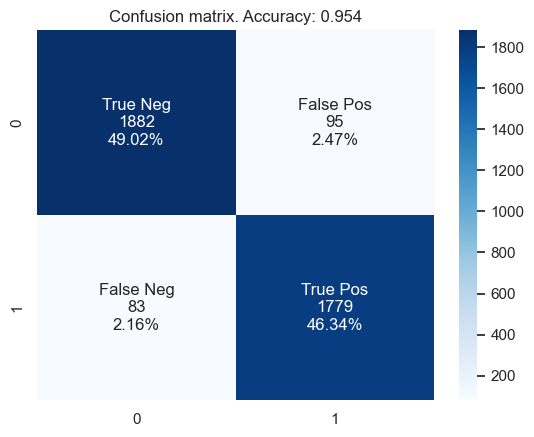

In [41]:
performance(model_logreg, tfidf_test, y_test)

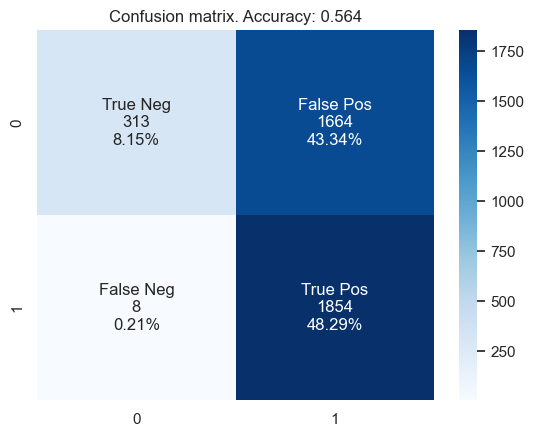

In [42]:
performance(model_knc, tfidf_test, y_test) #Extremely slow

It is extremely slow. In the document we can see that for sparse matrix, the model uses brute force to predict answer. Hence the sparse matrix using tfIdf is a very inefficient way to classify